### Missing Data Imputation

```
MCAR- Missing Completely at random
```
```
Missing Data Not at Random
```

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
df=sns.load_dataset('titanic')

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Some relationship between them


In [ ]:
df['cabin_null']=np.where(df['deck'].isnull(),1,0)

In [ ]:
df['cabin_null'].mean()

0.7721661054994389

In [ ]:
df.groupby(['survived'])['cabin_null'].mean()

survived
0    0.877960
1    0.602339
Name: cabin_null, dtype: float64

##### The information of the people who died could not be collected.

##### Thats what we can see that the average of the persons for 0th class is high

### Missing at Random

### Imputation with median

In [ ]:
 def impute_nan(df,variable,median):
   df[variable+'_'+'median']=df[variable].fillna(median)

impute_nan(df,'age',df['age'].median())

In [ ]:
print(df['age'].std())
print(df['age_median'].std())

14.526497332334044
13.019696550973194


# Random Sample Imputation


##### Selects a random value from dataset and impute with the value of random one

##### It assumes MCAR

In [ ]:
df=sns.load_dataset('titanic')
df=df[['age','fare','survived']]

In [ ]:
df.isnull().sum()

age         177
fare          0
survived      0
dtype: int64

In [ ]:
df['age'].dropna().sample()

213    30.0
Name: age, dtype: float64

In [ ]:
df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: age, Length: 177, dtype: float64

In [ ]:
 def impute_nan(df,variable,median):
   df[variable+'_'+'median']=df[variable].fillna(median)

   random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
   random_sample.index=df[df[variable].isnull()].index
   df.loc[df[variable].isnull(),variable+"_random"]=random_sample

impute_nan(df,'age',df['age'].median())

In [ ]:
len(df['age_random'].dropna())

177

In [ ]:
import matplotlib.pyplot as plt

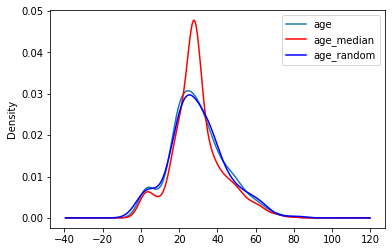

In [ ]:
fig=plt.figure()
ax= fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df['age_median'].plot(kind='kde',ax=ax,color='red')
df['age_random'].plot(kind='kde',ax=ax,color='blue')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


## Advantages

#### No distortion is happenning in the distribution

##### Easy to Implement

## Disadvantages

#### In every situation randomness wont work. Does not consider the exact relationship in the data. 

# Capturing Nan values with a new feature ( In Not MCAR, works best) 

In [ ]:
df=sns.load_dataset('titanic')
df=df[['age','fare','survived']]
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [ ]:
df['age_NaN']=np.where(df['age'].isnull(),1,0)

In [ ]:
df['age'].fillna(df['age'].median())

##### No we are not imputing the 1 value in the isnull place rather than creating a new column age_Nan which captures where there was missing values

## Advantages

##### Captures importance of missing values

## Disadvantages

##### Creates additional features. May lead to Curse of Diamentionality

# End of Distribution Imputation

##### we are going to pick up value after 3rd Std.dev

In [ ]:
df=sns.load_dataset('titanic')
df=df[['age','fare','survived']]

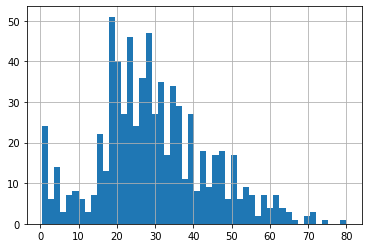

In [ ]:
df.age.hist(bins=50)

In [ ]:
extreme_value=df.age.mean() + 3*df.age.std()

In [ ]:
def impute_nan(df,variable,median,extreme):
  df[variable+"_end_distribution"]=df[variable].fillna(extreme_value)
  df[variable].fillna(median,inplace=True)

In [ ]:
impute_nan(df,'age',df.age.median(),extreme_value)

In [ ]:
df.head()

,age,fare,survived,age_end_distribution
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0


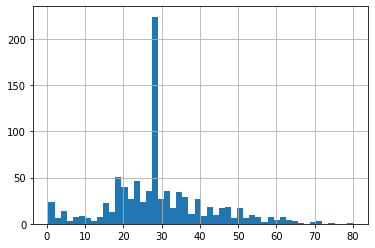

In [ ]:
 df['age'].hist(bins=50)

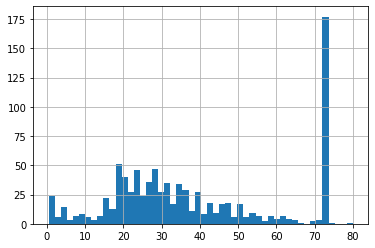

In [ ]:
 df['age_end_distribution'].hist(bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


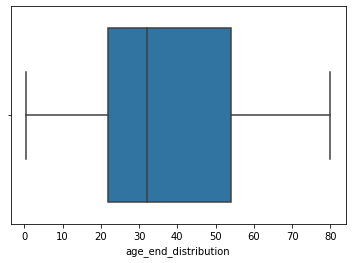

In [ ]:
sns.boxplot('age_end_distribution',data=df)

## Advantages

##### Captures importance of missingbess if there is one

## Disadvantages

##### 1.Distorts original distribution
##### 2.if the number of NA is huge then it will mask true outliers  in the distribution

##### 3.if the number of NA is small then the values imputed will be considered outliers


In [ ]:
!pip install kaggle